# K-Means Clustering for customer segmentation

There are many models for clustering, but in this notebook, we will focus on one of the simplest and most widely used models: K-means. Despite its simplicity, **K-means** is extensively used in various data science applications, particularly when quick insights are needed from unlabeled data.

In this notebook, you will learn how to use K-means for customer segmentation.



Some real-world applications of K-means include:

- **Customer Segmentation**: Grouping customers based on purchasing behavior, preferences, and demographics to tailor marketing strategies.
- **Understanding Website Visitor Behavior**: Analyzing web traffic to identify different types of visitors and their goals, enhancing user experience and website design.
- **Pattern Recognition**: Identifying patterns and trends in data, which is useful in image and speech recognition.
- **Machine Learning**: Serving as a preprocessing step to organize data, reduce dimensionality, and improve the performance of other algorithms.
- **Data Compression**: Reducing the amount of data by clustering similar data points, which simplifies storage and speeds up processing.
- **Market Research**: Segmenting survey respondents to understand different market segments and their needs.
- **Document Clustering**: Grouping similar documents for organizing large sets of text data, such as news articles or research papers.
- **Social Network Analysis**: Detecting communities within social networks to understand social structures and influence.
- **Anomaly Detection**: Identifying unusual data points that do not fit into any cluster, which is useful for fraud detection and network security.
- **Image Segmentation**: Dividing an image into segments to simplify its representation and make analysis easier, often used in medical imaging.


Here we first load the required libraries in python.

In [118]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Dataset Description

Imagine that you have a customer dataset and need to apply customer segmentation on this historical data. Customer segmentation involves partitioning a customer base into groups of individuals with similar characteristics. This strategy is crucial for businesses to effectively target specific customer groups and allocate marketing resources efficiently.

For example, one group might consist of high-profit, low-risk customers who are more likely to purchase products or subscribe to services, requiring strategies to retain them. Another group might include customers from non-profit organizations, needing different marketing approaches.

# Download the dataset

In [119]:
customerfile = os.path.join('data', '/content/Mall_Customers.csv')
df = pd.read_csv(customerfile)
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Feature sleection for the model
### Considering only 2 features (Annual income and Spending Score) and no Label available

In [120]:
X= df.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Feature set


In [121]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Clustering

Lets apply k-means on our dataset, and take look at cluster labels.

In [122]:
from sklearn.cluster import KMeans
wcss=[]
labels = []

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,10):
    k_means = KMeans(init = "k-means++", n_clusters = i, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
labels.append(k_means.labels_)

print(labels)
print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[array([8, 5, 3, 5, 8, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 8, 5, 8, 5, 8, 5,
       3, 5, 3, 5, 8, 5, 8, 5, 3, 5, 3, 5, 3, 5, 3, 5, 8, 5, 8, 5, 8, 1,
       8, 1, 1, 1, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 0, 4, 6, 4, 0, 4, 0, 4,
       6, 4, 0, 4, 0, 4, 0, 4, 0, 4, 6, 4, 0, 4, 6, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 6, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2], dtype=int32)]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30259.65720728547, 25095.70320999756, 21830.041978049434]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualizing the ELBOW method to get the optimal value of K

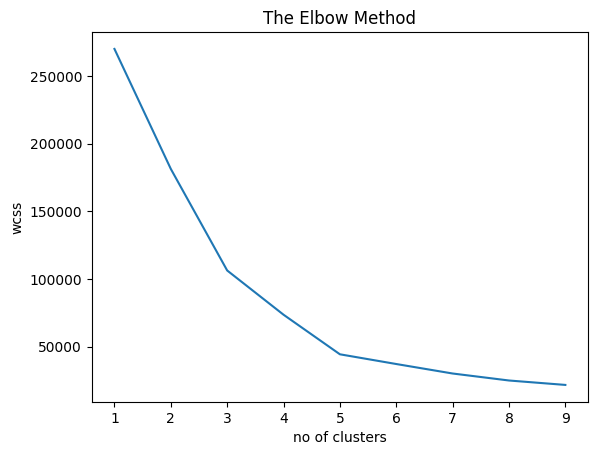

In [123]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

If you zoom out this curve then you will see that last elbow comes at k=5
no matter what range we select ex- (1,20). Also we will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
that is why we usually prefer range (1,10)

Finally we got that k=5

In [124]:
k_means = KMeans(init = "k-means++", n_clusters = 5, random_state=0)
k_means.fit(X)
labels_ = k_means.labels_
y_kmeans= k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Visualizing all the clusters

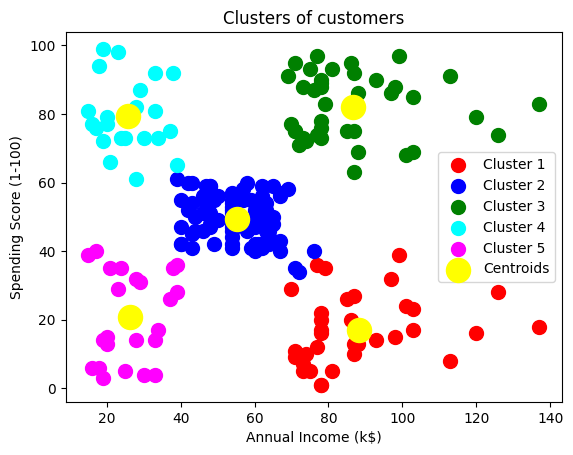

In [125]:


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Model Interpretation
### Cluster 1 (Red Color) -> earning high but spending less
### cluster 2 (Blue Colr) -> average in terms of earning and spending
### cluster 3 (Green Color) -> earning high and also spending high
### cluster 4 (cyan Color) -> earning less but spending more
### Cluster 5 (magenta Color) -> Earning less , spending less


